# K Nearest Neighbors Project - Solution

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.

### Import Libraries Import pandas,seaborn, and the usual libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data

In [2]:
df = pd.read_csv("KNN_Project_Data")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


We again see that the columns names are chose to hide the identity of the data. This is very common as we can see that companies might want to solve their problem by not revealing any information to the person solving this problenm. None the less, we will proceed with the EDA, Data Cleaning, Model building and Evaluation

#### One thing we will do differently here is, loop with 2 things.
1. K Value
2. We will also change the train_test_split

We will store the data index wise, indexed with K value and use the same data set when we reach the min error rate.

##### Just an experimentation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


<AxesSubplot:>

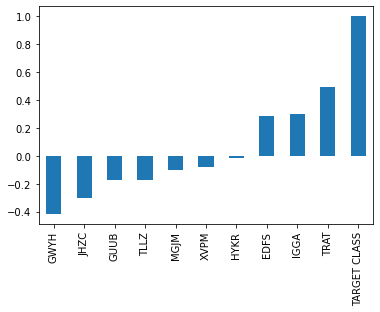

In [13]:
df.corrwith(df['TARGET CLASS']).sort_values().plot(kind='bar')

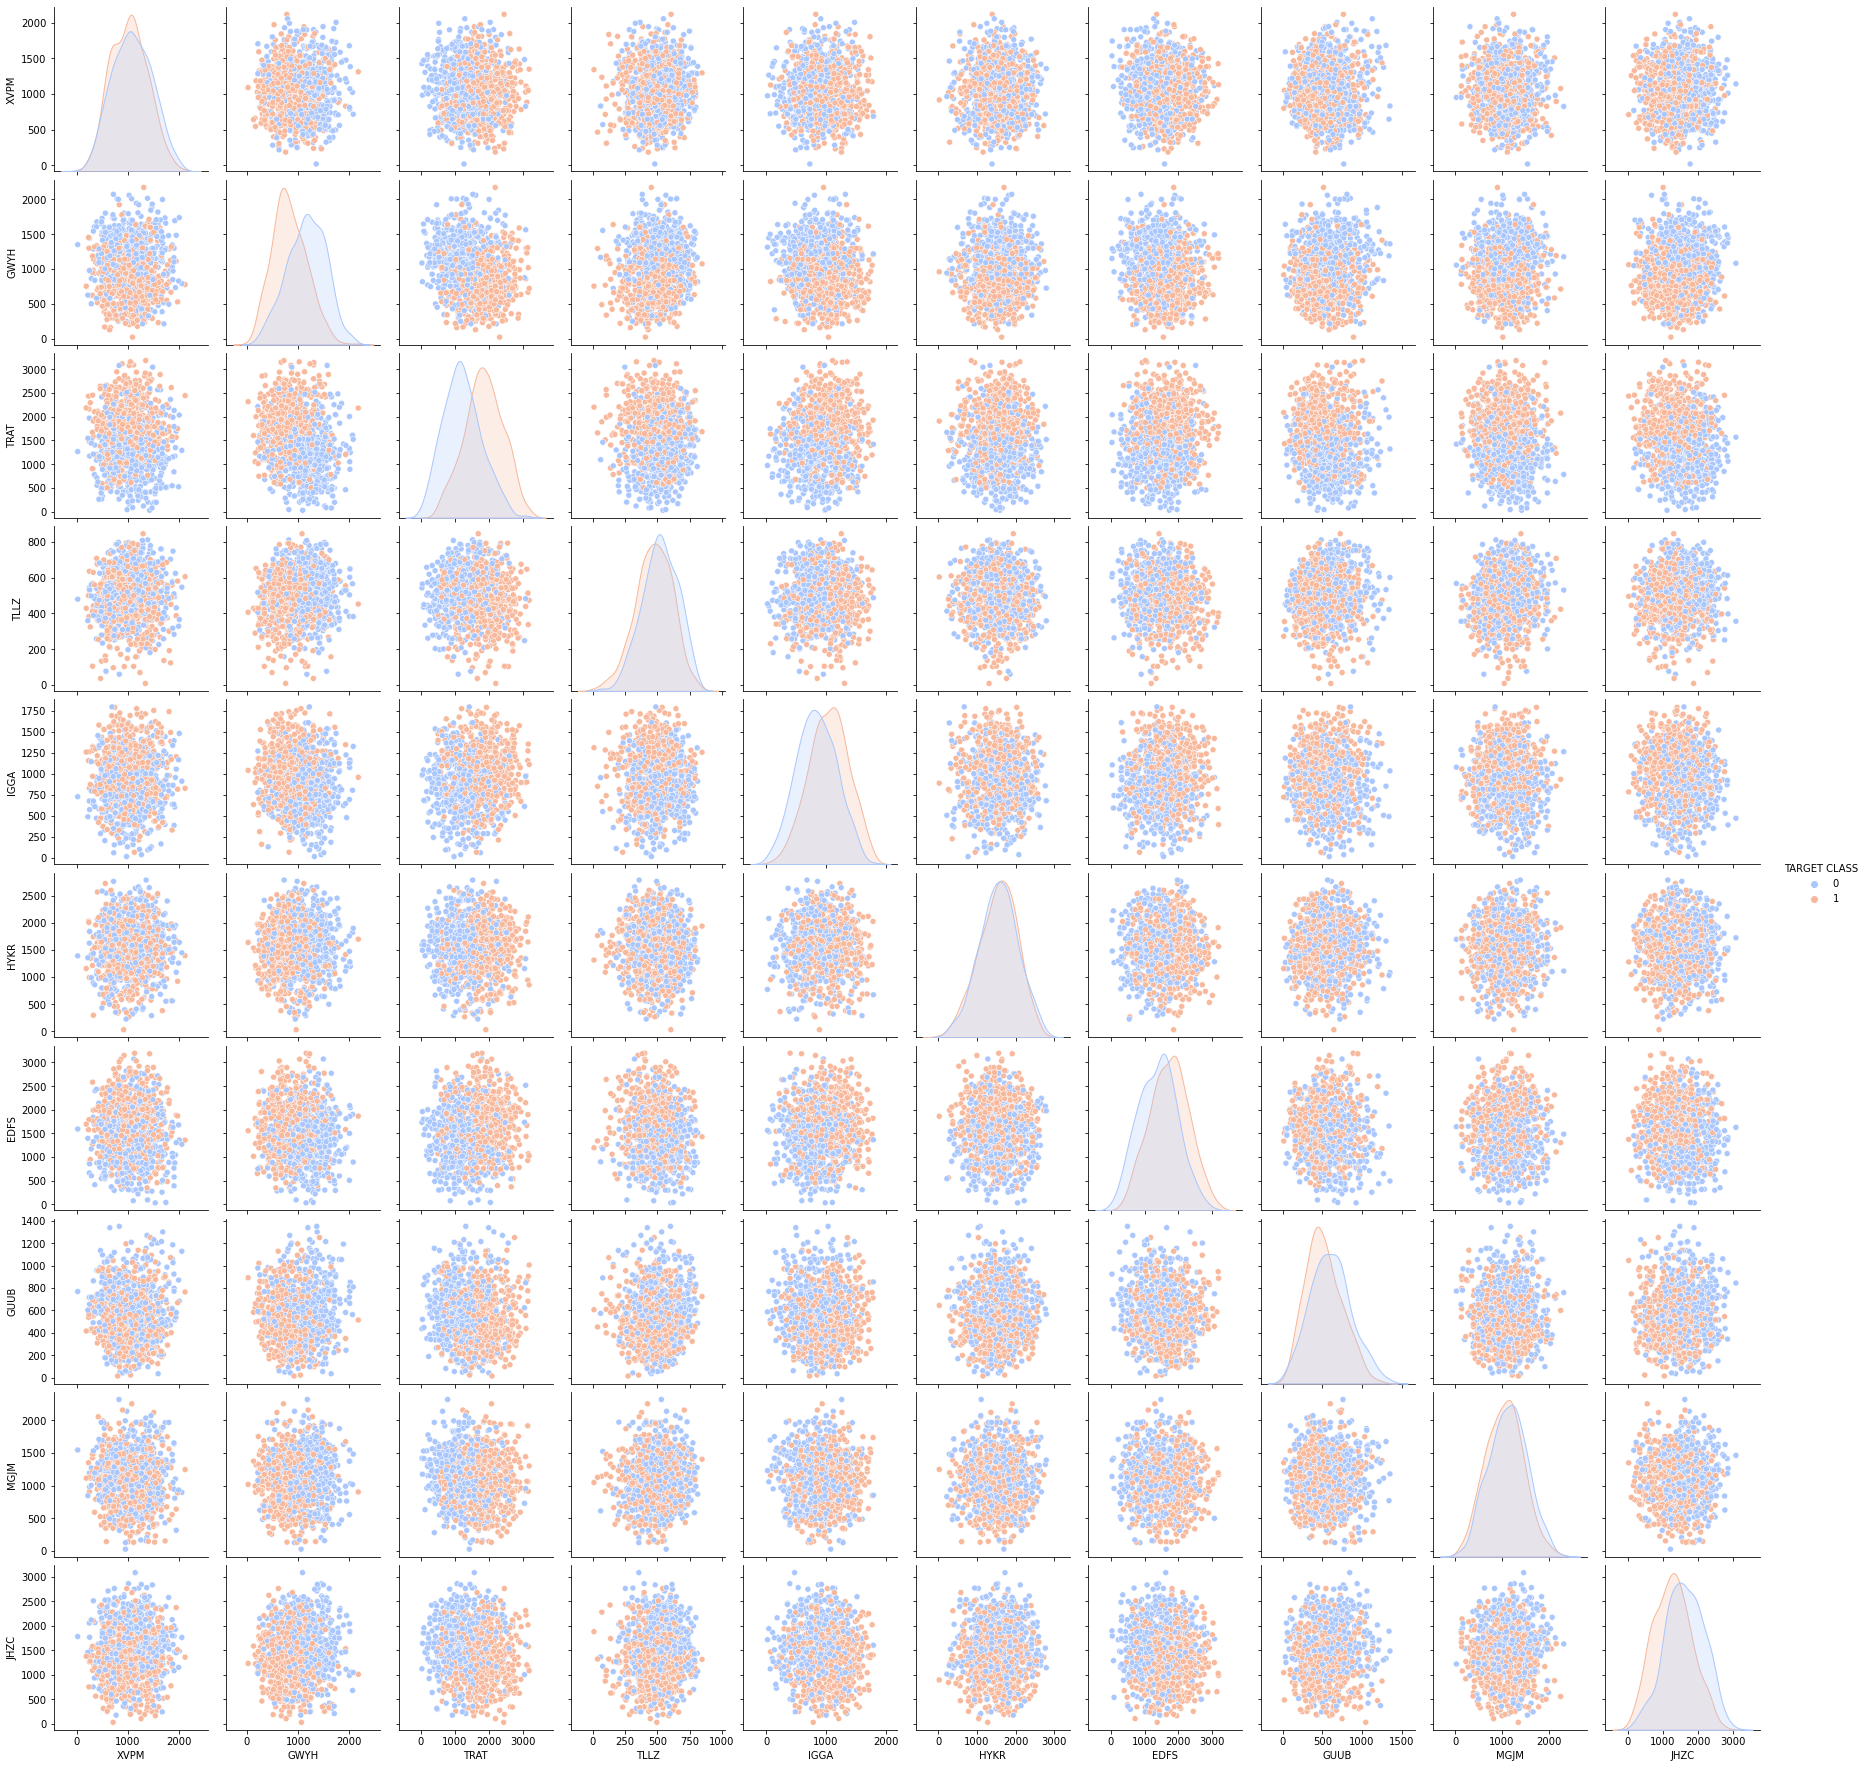

In [14]:
sns.pairplot(hue='TARGET CLASS', data=df, palette='coolwarm')

<AxesSubplot:>

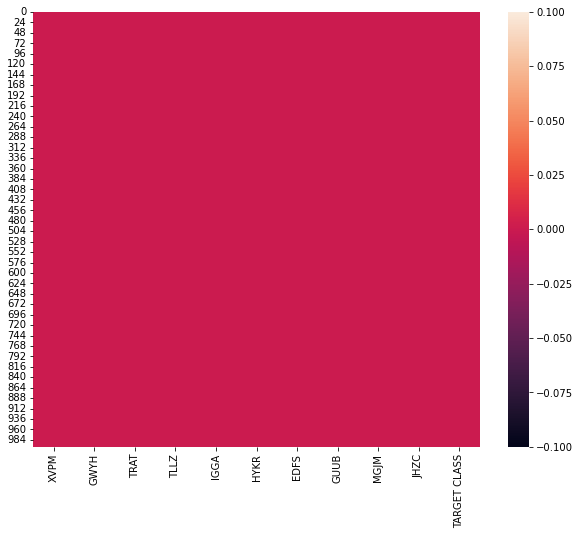

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<AxesSubplot:>

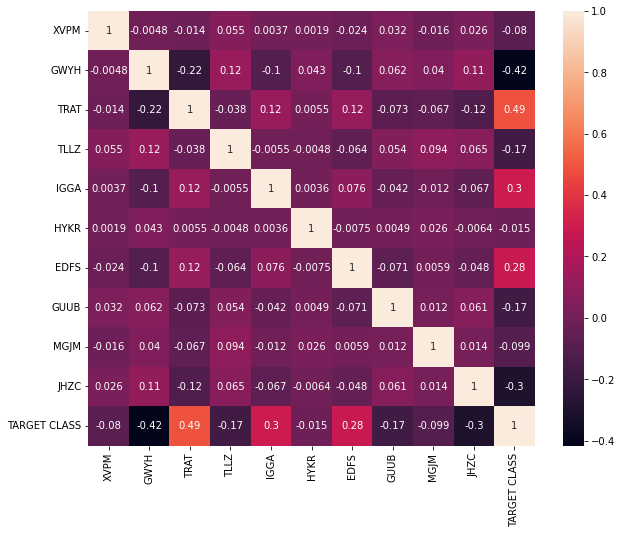

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Building model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [33]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [34]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [35]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [36]:
scaled_data = scaler.transform(X)

In [37]:
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

In [38]:
scaled_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [39]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
y_pred = knn.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.74      0.74      0.74       148

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



So we see that the accuracy is kind of okay. let's see how it fares with different K values

In [69]:
def loop_through_k_values(k_vals, error_rate):
    for i in range(1, k_vals+1):
        print(">>> Trying with K val : {}".format(i))
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    return error_rate

# Approach 1 : Looping through K values

In [70]:
error_rate = []
error_rate = loop_through_k_values(40, error_rate)

>>> Trying with K val : 1
>>> Trying with K val : 2
>>> Trying with K val : 3
>>> Trying with K val : 4
>>> Trying with K val : 5
>>> Trying with K val : 6
>>> Trying with K val : 7
>>> Trying with K val : 8
>>> Trying with K val : 9
>>> Trying with K val : 10
>>> Trying with K val : 11
>>> Trying with K val : 12
>>> Trying with K val : 13
>>> Trying with K val : 14
>>> Trying with K val : 15
>>> Trying with K val : 16
>>> Trying with K val : 17
>>> Trying with K val : 18
>>> Trying with K val : 19
>>> Trying with K val : 20
>>> Trying with K val : 21
>>> Trying with K val : 22
>>> Trying with K val : 23
>>> Trying with K val : 24
>>> Trying with K val : 25
>>> Trying with K val : 26
>>> Trying with K val : 27
>>> Trying with K val : 28
>>> Trying with K val : 29
>>> Trying with K val : 30
>>> Trying with K val : 31
>>> Trying with K val : 32
>>> Trying with K val : 33
>>> Trying with K val : 34
>>> Trying with K val : 35
>>> Trying with K val : 36
>>> Trying with K val : 37
>>> Trying

In [71]:
error_rate

[0.26,
 0.28,
 0.22333333333333333,
 0.23333333333333334,
 0.21,
 0.22,
 0.2,
 0.21,
 0.19333333333333333,
 0.19,
 0.19333333333333333,
 0.18666666666666668,
 0.19333333333333333,
 0.19,
 0.18333333333333332,
 0.18,
 0.17666666666666667,
 0.18,
 0.18666666666666668,
 0.18333333333333332,
 0.18,
 0.18333333333333332,
 0.18333333333333332,
 0.17666666666666667,
 0.19,
 0.19,
 0.19,
 0.18333333333333332,
 0.18666666666666668,
 0.18,
 0.18,
 0.17333333333333334,
 0.18333333333333332,
 0.18,
 0.18,
 0.17333333333333334,
 0.18,
 0.18333333333333332,
 0.19,
 0.18666666666666668]

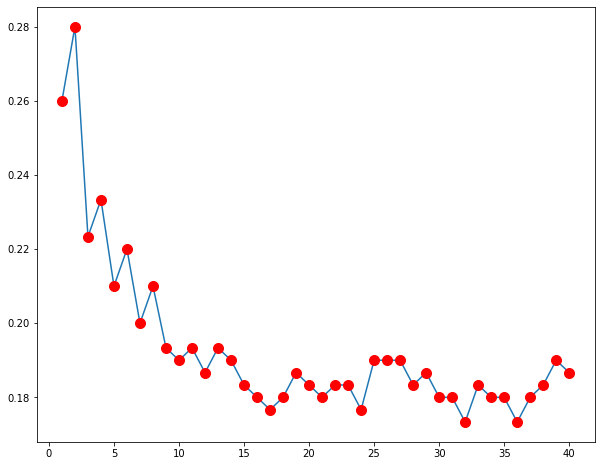

In [77]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 41), error_rate, linestyle="-", marker='o', markerfacecolor='red', markersize=10, markeredgecolor='red') # pretty flat ! Let's try different approach

#### Looks like k = 24 or k = 32 yeilds good accuracy. So let's check that

In [79]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       152
           1       0.81      0.83      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [80]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



# Approach 2 : Change the train_test_split as well

In [88]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return X_train, X_test, y_train, y_test

In [92]:
def loop_through_k_values_split_data(k_vals, error_rate):
    for i in range(1, k_vals+1):
        print(">>> Trying with K val : {}".format(i))
        for j in range(6):
            print("    >>> Looping with Train Test Split : {}.{}".format(i, j))
            X_train, X_test, y_train, y_test = split_data(X, y)
            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            error_rate.append(np.mean(y_pred != y_test))
        print("\n")
    return error_rate

In [93]:
# Change K values
# For each K value, change the train_test_split 5 times.
# Total Error value : 40 * 5 = 200

In [94]:
error_rate = []
error_rate = loop_through_k_values_split_data(40, error_rate)
print(error_rate)

>>> Trying with K val : 1
    >>> Looping with Train Test Split : 1.0
    >>> Looping with Train Test Split : 1.1
    >>> Looping with Train Test Split : 1.2
    >>> Looping with Train Test Split : 1.3
    >>> Looping with Train Test Split : 1.4
    >>> Looping with Train Test Split : 1.5


>>> Trying with K val : 2
    >>> Looping with Train Test Split : 2.0
    >>> Looping with Train Test Split : 2.1
    >>> Looping with Train Test Split : 2.2
    >>> Looping with Train Test Split : 2.3
    >>> Looping with Train Test Split : 2.4
    >>> Looping with Train Test Split : 2.5


>>> Trying with K val : 3
    >>> Looping with Train Test Split : 3.0
    >>> Looping with Train Test Split : 3.1
    >>> Looping with Train Test Split : 3.2
    >>> Looping with Train Test Split : 3.3
    >>> Looping with Train Test Split : 3.4
    >>> Looping with Train Test Split : 3.5


>>> Trying with K val : 4
    >>> Looping with Train Test Split : 4.0
    >>> Looping with Train Test Split : 4.1
    >>> Lo

    >>> Looping with Train Test Split : 29.5


>>> Trying with K val : 30
    >>> Looping with Train Test Split : 30.0
    >>> Looping with Train Test Split : 30.1
    >>> Looping with Train Test Split : 30.2
    >>> Looping with Train Test Split : 30.3
    >>> Looping with Train Test Split : 30.4
    >>> Looping with Train Test Split : 30.5


>>> Trying with K val : 31
    >>> Looping with Train Test Split : 31.0
    >>> Looping with Train Test Split : 31.1
    >>> Looping with Train Test Split : 31.2
    >>> Looping with Train Test Split : 31.3
    >>> Looping with Train Test Split : 31.4
    >>> Looping with Train Test Split : 31.5


>>> Trying with K val : 32
    >>> Looping with Train Test Split : 32.0
    >>> Looping with Train Test Split : 32.1
    >>> Looping with Train Test Split : 32.2
    >>> Looping with Train Test Split : 32.3
    >>> Looping with Train Test Split : 32.4
    >>> Looping with Train Test Split : 32.5


>>> Trying with K val : 33
    >>> Looping with Train Te

In [95]:
print(len(error_rate))

240


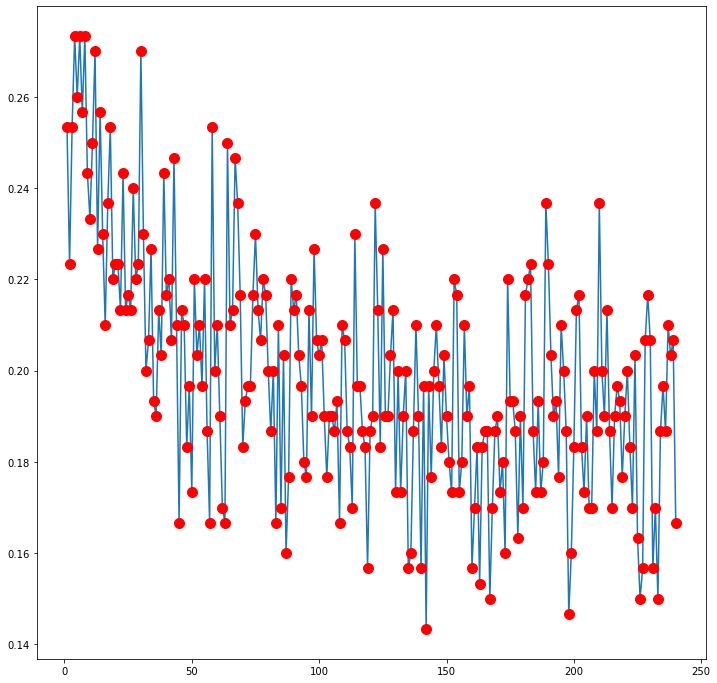

In [97]:
plt.figure(figsize=(12,12))
plt.plot(range(1, len(error_rate)+1), error_rate, linestyle="-", marker='o', markerfacecolor='red', markersize=10, markeredgecolor='red') # pretty flat ! Let's try different approach

Few observations
1. If you see here, at k ~ 140, we see leas error. But question is, do we want to select such a huge value for K?
Remember, K value is the number of points that the model refers to decide the likelyhood of the new point.
We also see that at very next value, the error rate goes up.

So we need to try a few things before we actually choose the model. Now, for experimentation purposes, let's keep moving forward.

In [99]:
# Let's get the min error rate and the index as k value is not clear via the graph

min_k = min(error_rate)
min_k

0.14333333333333334

In [102]:
k_val = error_rate.index(min_k) + 1

In [103]:
k_val

142

In [110]:
knn = KNeighborsClassifier(n_neighbors=k_val)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       152
           1       0.81      0.84      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
# So as you can see, we see only partial changes here. Hence we can take this as a standard K value for this data set

# Good Job !